<a href="https://colab.research.google.com/github/suhitaghosh10/colab_examples/blob/master/mnist_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import datasets
from imgaug import augmenters
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
plt.gray()

<Figure size 432x288 with 0 Axes>

In [0]:
## Download the data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


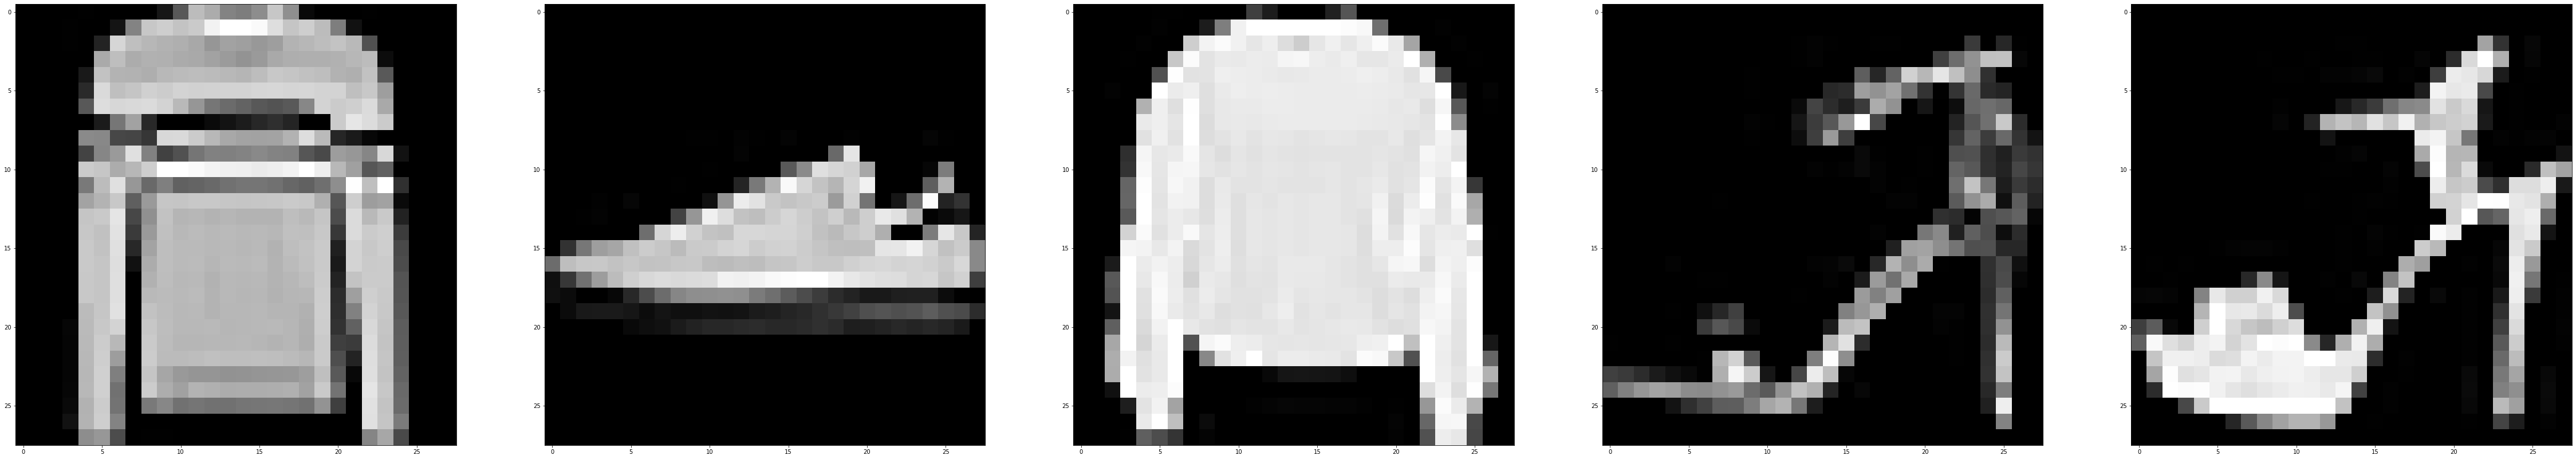

In [0]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(x_train[i, :, :, 0].reshape(28, 28))

In [0]:
#add sample noise - Salt and Pepper
noise = augmenters.SaltAndPepper(0.1)
seq_obj = augmenters.Sequential([noise])

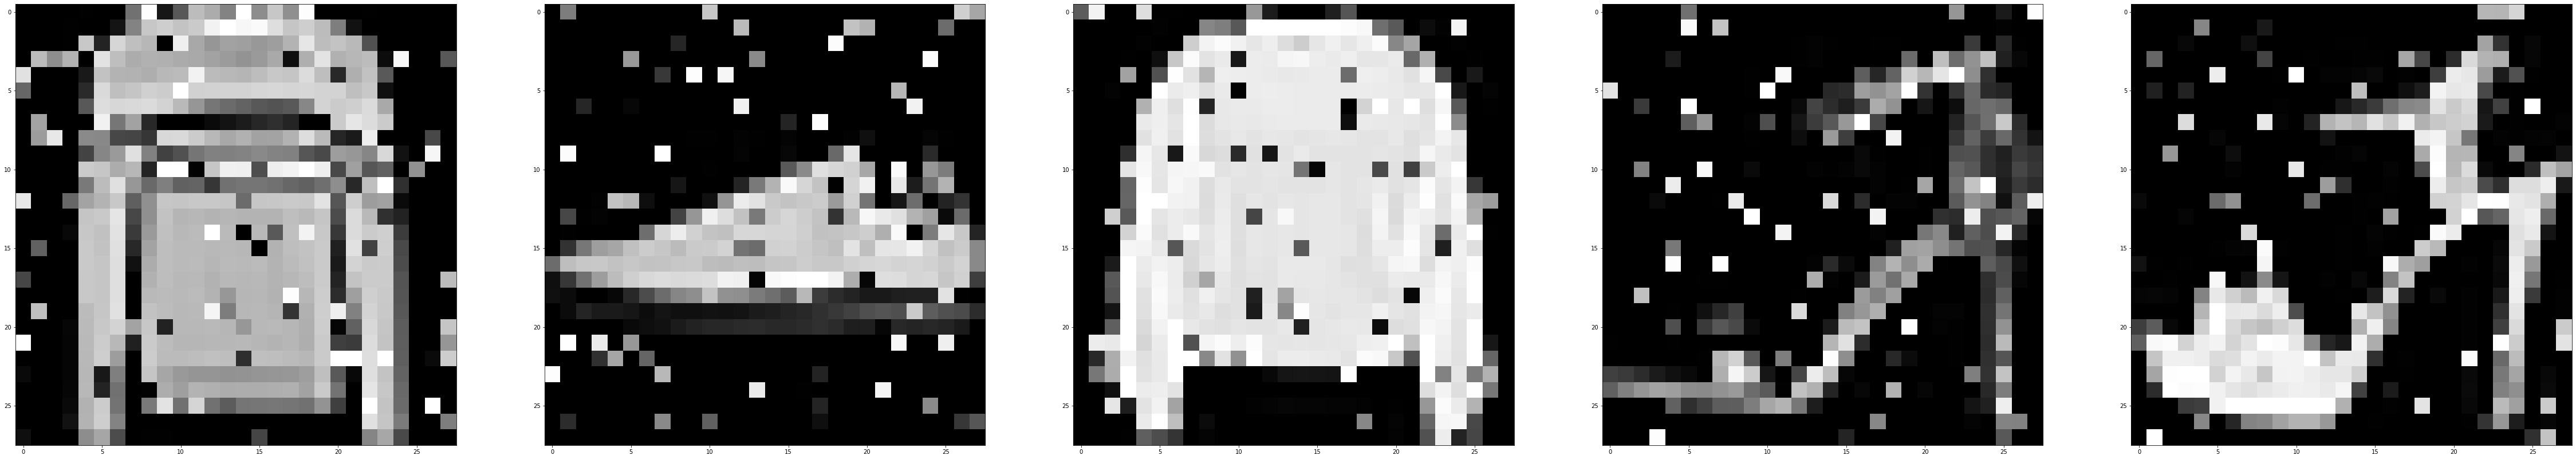

In [0]:
train_x_n = seq_obj.augment_images(x_train * 255) / 255
val_x_n = seq_obj.augment_images(x_test * 255) / 255
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i, :, :, 0].reshape(28, 28))

In [0]:
# input layer

input_layer = Input(shape=(x_train.shape[1], x_train.shape[2], 1))

#encoder

encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

# decoder
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(decoded_layer3)


# compile the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

# run the model
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
#just train for 5 epochs
history = model.fit(train_x_n, x_train, epochs=5, batch_size=2048, validation_data=(val_x_n, x_test), callbacks=[early_stopping])

Epoch 1/5
30/30 [==============================] - 5s 169ms/step - loss: 0.1027 - val_loss: 0.0554
Epoch 2/5
30/30 [==============================] - 5s 165ms/step - loss: 0.0423 - val_loss: 0.0353
Epoch 3/5
30/30 [==============================] - 5s 164ms/step - loss: 0.0321 - val_loss: 0.0294
Epoch 4/5
30/30 [==============================] - 5s 165ms/step - loss: 0.0276 - val_loss: 0.0259
Epoch 5/5
30/30 [==============================] - 5s 169ms/step - loss: 0.0253 - val_loss: 0.0241


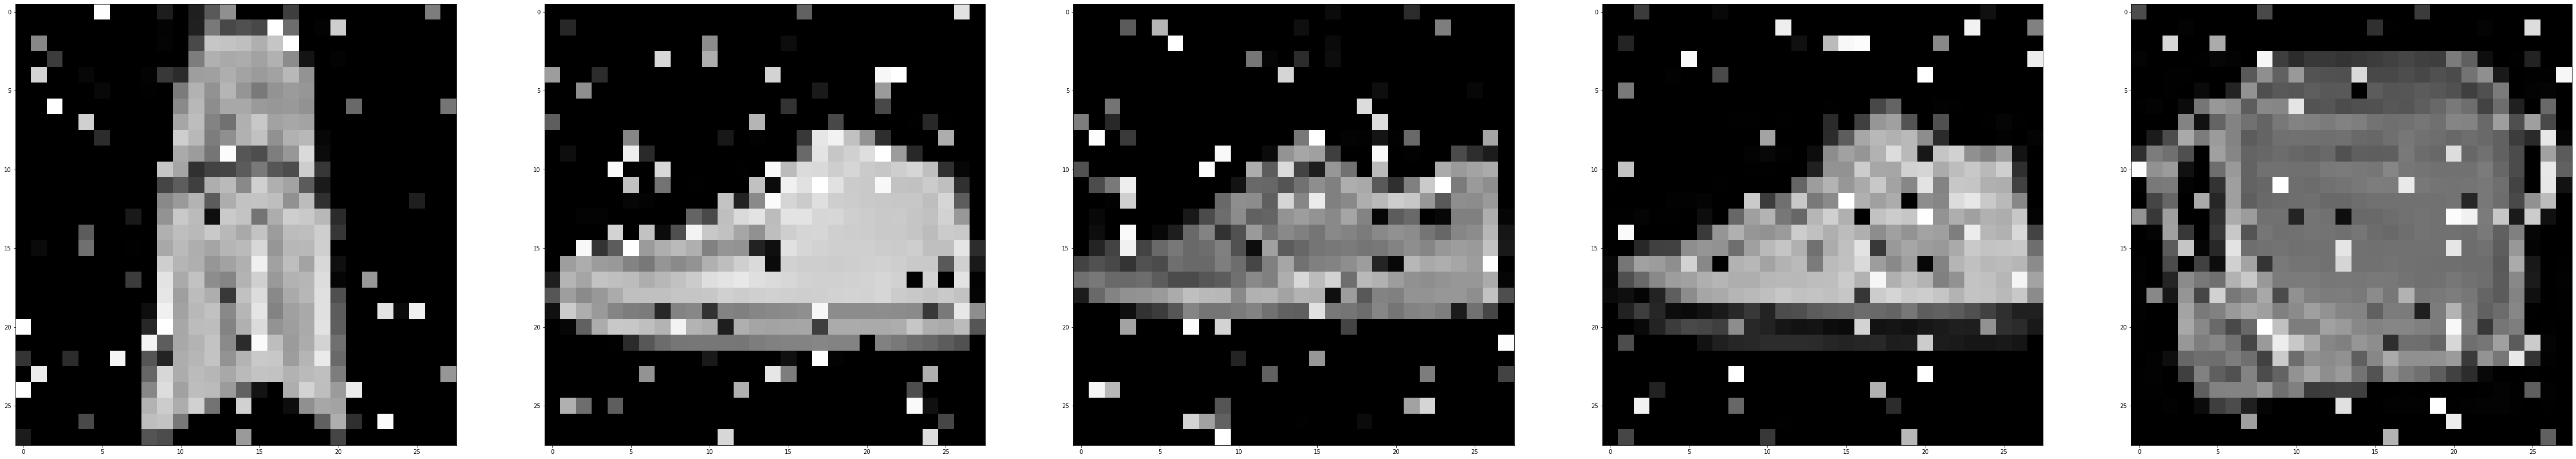

In [0]:
n = np.random.randint(0,len(val_x_n)-5)
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(val_x_n[a, :, :, 0].reshape(28, 28))
plt.show()

In [0]:
prediction = model.predict(val_x_n[n:n+5])
prediction.shape

(5, 28, 28, 1)

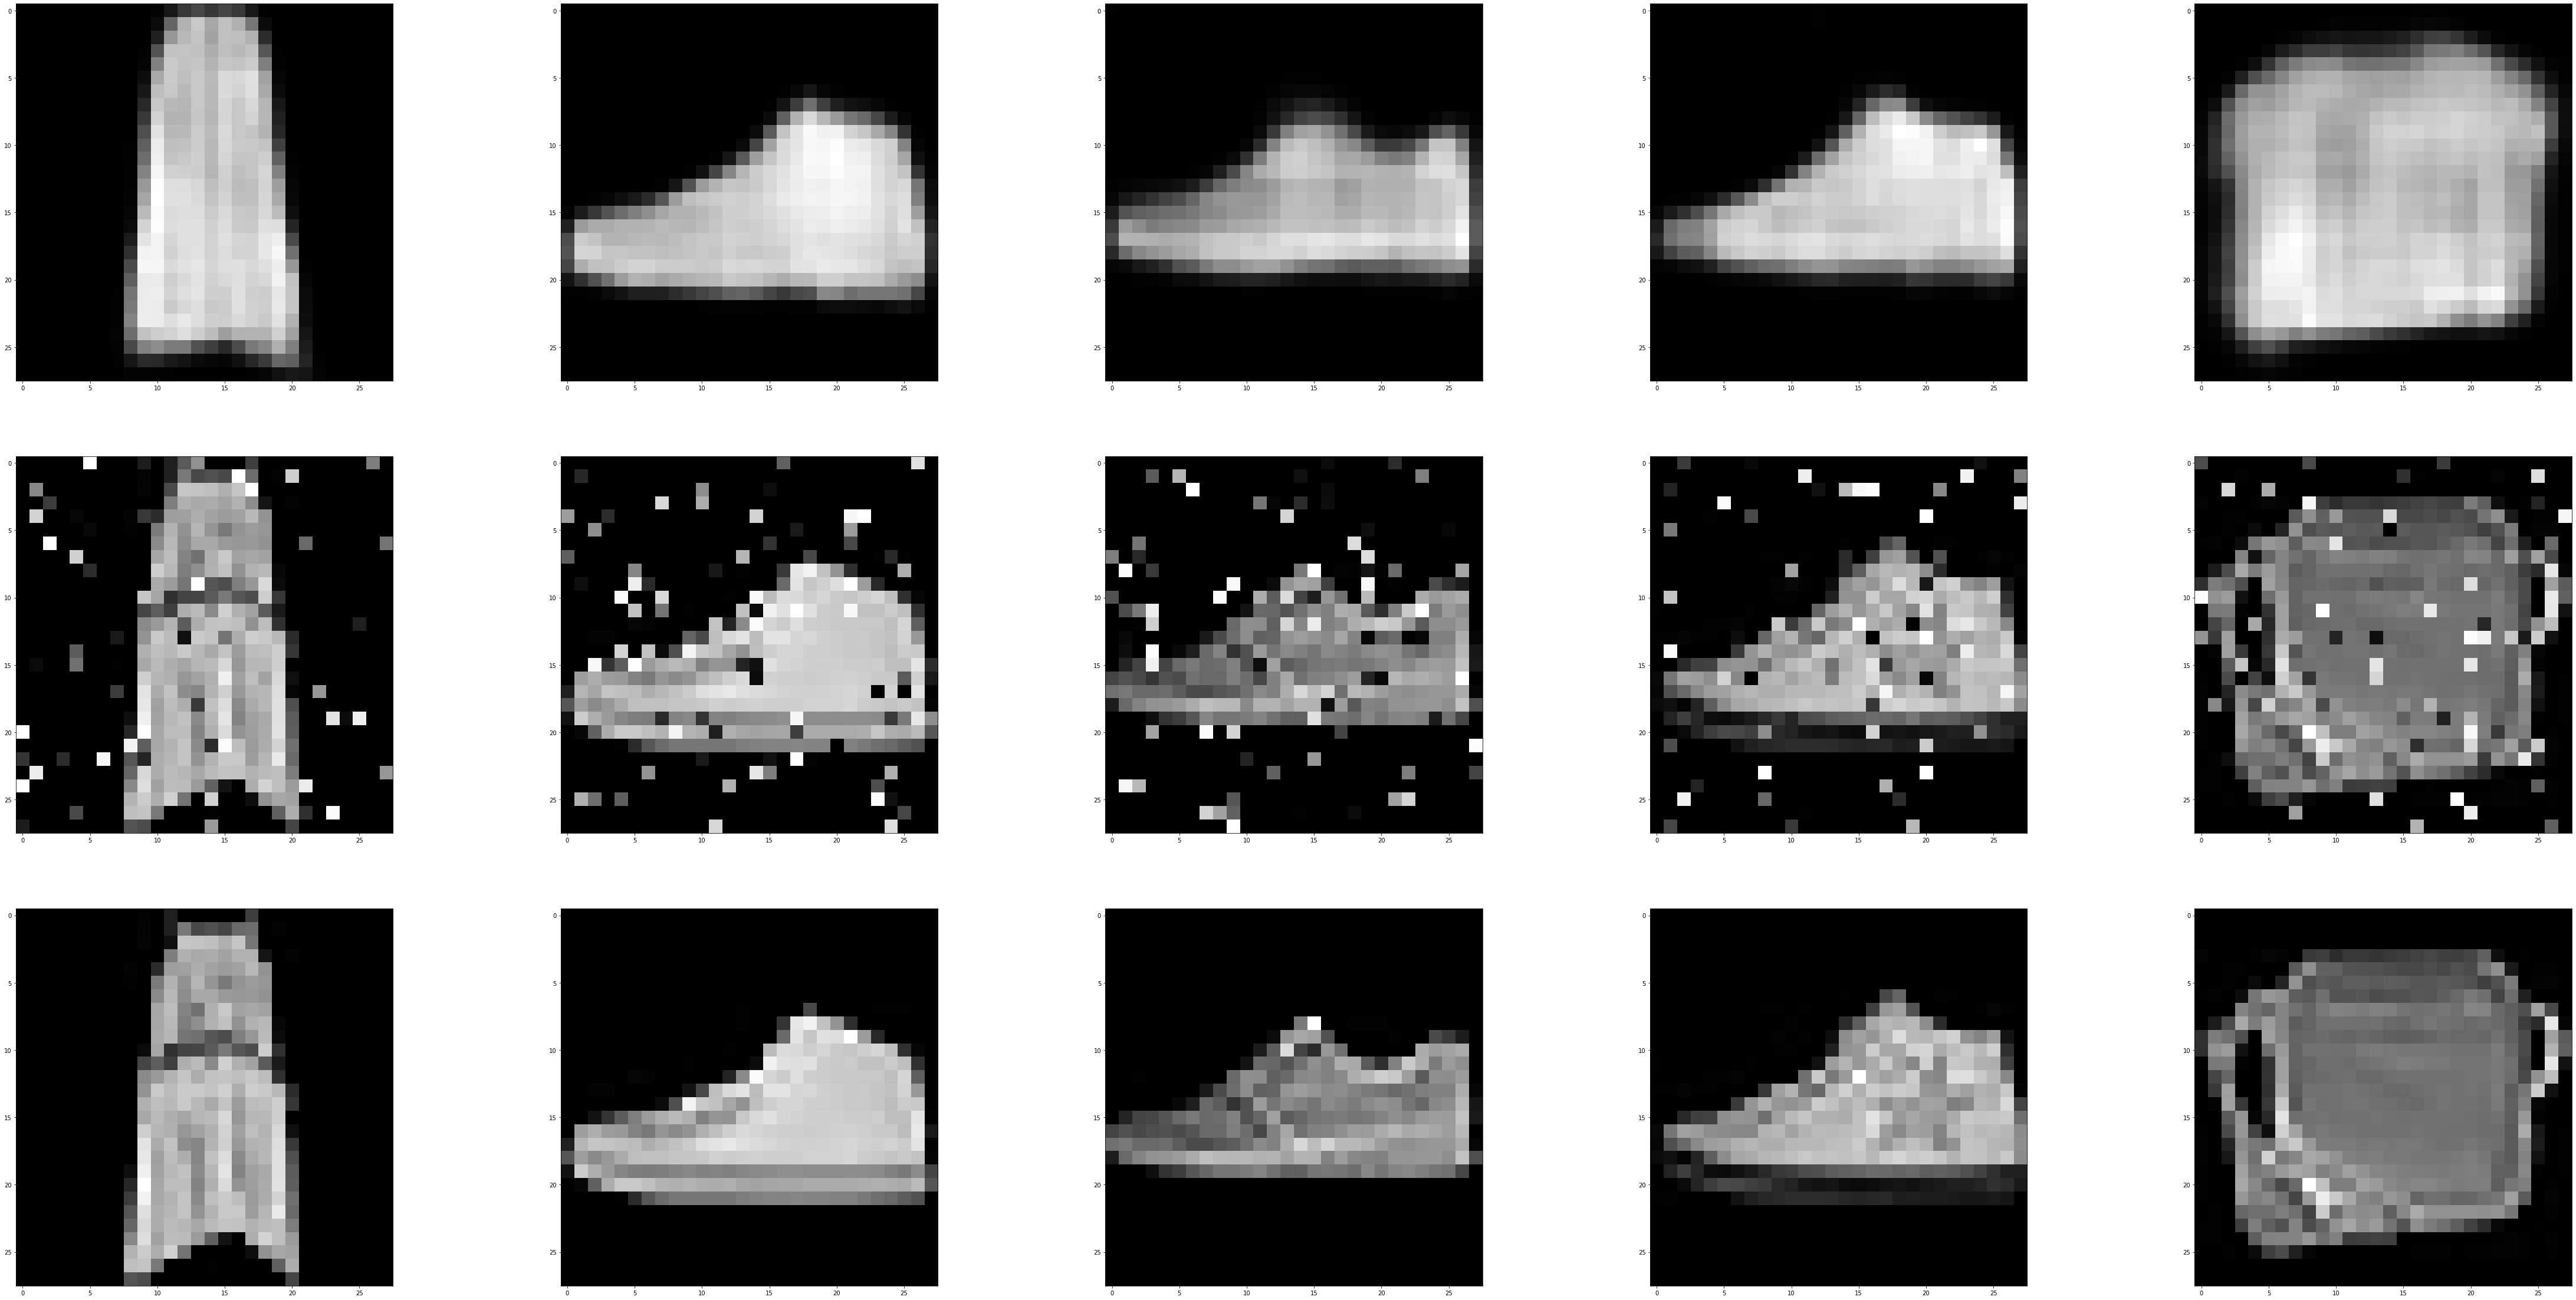

In [0]:
f, ax = plt.subplots(3,5)
f.set_size_inches(80, 40)
for i,a in enumerate(range(5)):
    ax[0,i].imshow(prediction[a, :, :, 0].reshape(28, 28))
    ax[1,i].imshow(val_x_n[n+i, :,:,0].reshape(28, 28))
    ax[2,i].imshow(x_test[n+i, :,:,0].reshape(28, 28))
plt.show()

In [0]:
model_2 = Model(input_layer, latent)
model_2.compile(optimizer='adam', loss='mse')

In [0]:
preds = model_2.predict(val_x_n[n:n+5])
preds.shape

(5, 4, 4, 16)

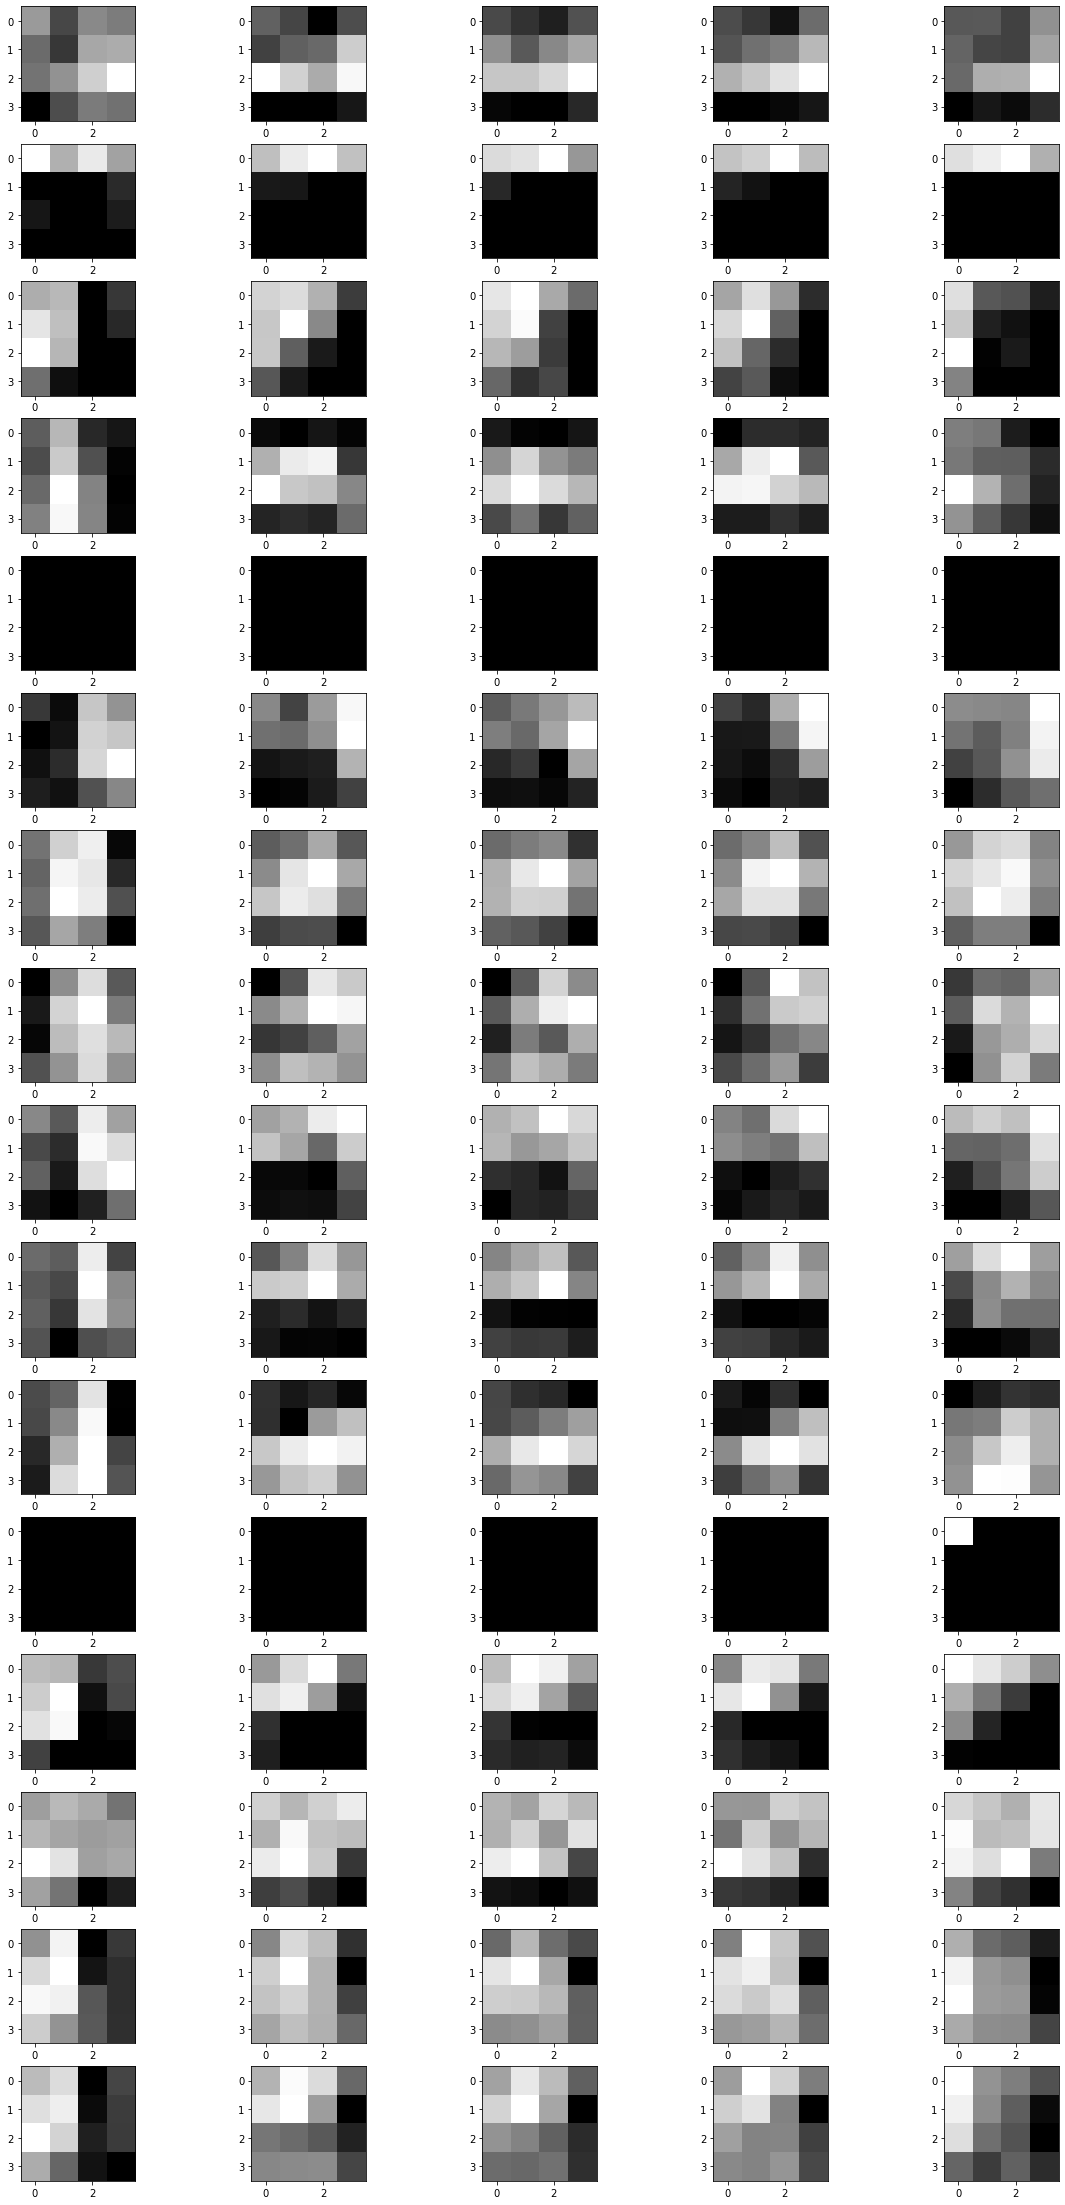

In [0]:
f, ax = plt.subplots(16,5)
ax = ax.ravel()
f.set_size_inches(20, 40)
for j in range(16):
    for i,a in enumerate(range(n,n+5)):
        ax[j*5 + i].imshow(preds[i, :, :, j])
plt.show()

In [0]:
history = model.fit(train_x_n, x_train, epochs=1000, batch_size=2048, validation_data=(val_x_n, x_test), callbacks=[early_stopping])

Epoch 1/1000
30/30 [==============================] - 5s 164ms/step - loss: 0.0138 - val_loss: 0.0137
Epoch 2/1000
30/30 [==============================] - 5s 165ms/step - loss: 0.0140 - val_loss: 0.0137
Epoch 3/1000
30/30 [==============================] - 5s 166ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 4/1000
30/30 [==============================] - 5s 165ms/step - loss: 0.0135 - val_loss: 0.0137
Epoch 5/1000
30/30 [==============================] - 5s 165ms/step - loss: 0.0135 - val_loss: 0.0136
Epoch 6/1000
30/30 [==============================] - 5s 166ms/step - loss: 0.0133 - val_loss: 0.0133
Epoch 7/1000
30/30 [==============================] - 5s 166ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 8/1000
30/30 [==============================] - 5s 165ms/step - loss: 0.0132 - val_loss: 0.0132
Epoch 9/1000
30/30 [==============================] - 5s 165ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 10/1000
30/30 [==============================] - 5s 165ms/step - loss: 0.013

KeyboardInterrupt: ignored

In [0]:
prediction = model.predict(val_x_n[n:n+5])
prediction.shape

(5, 28, 28, 1)

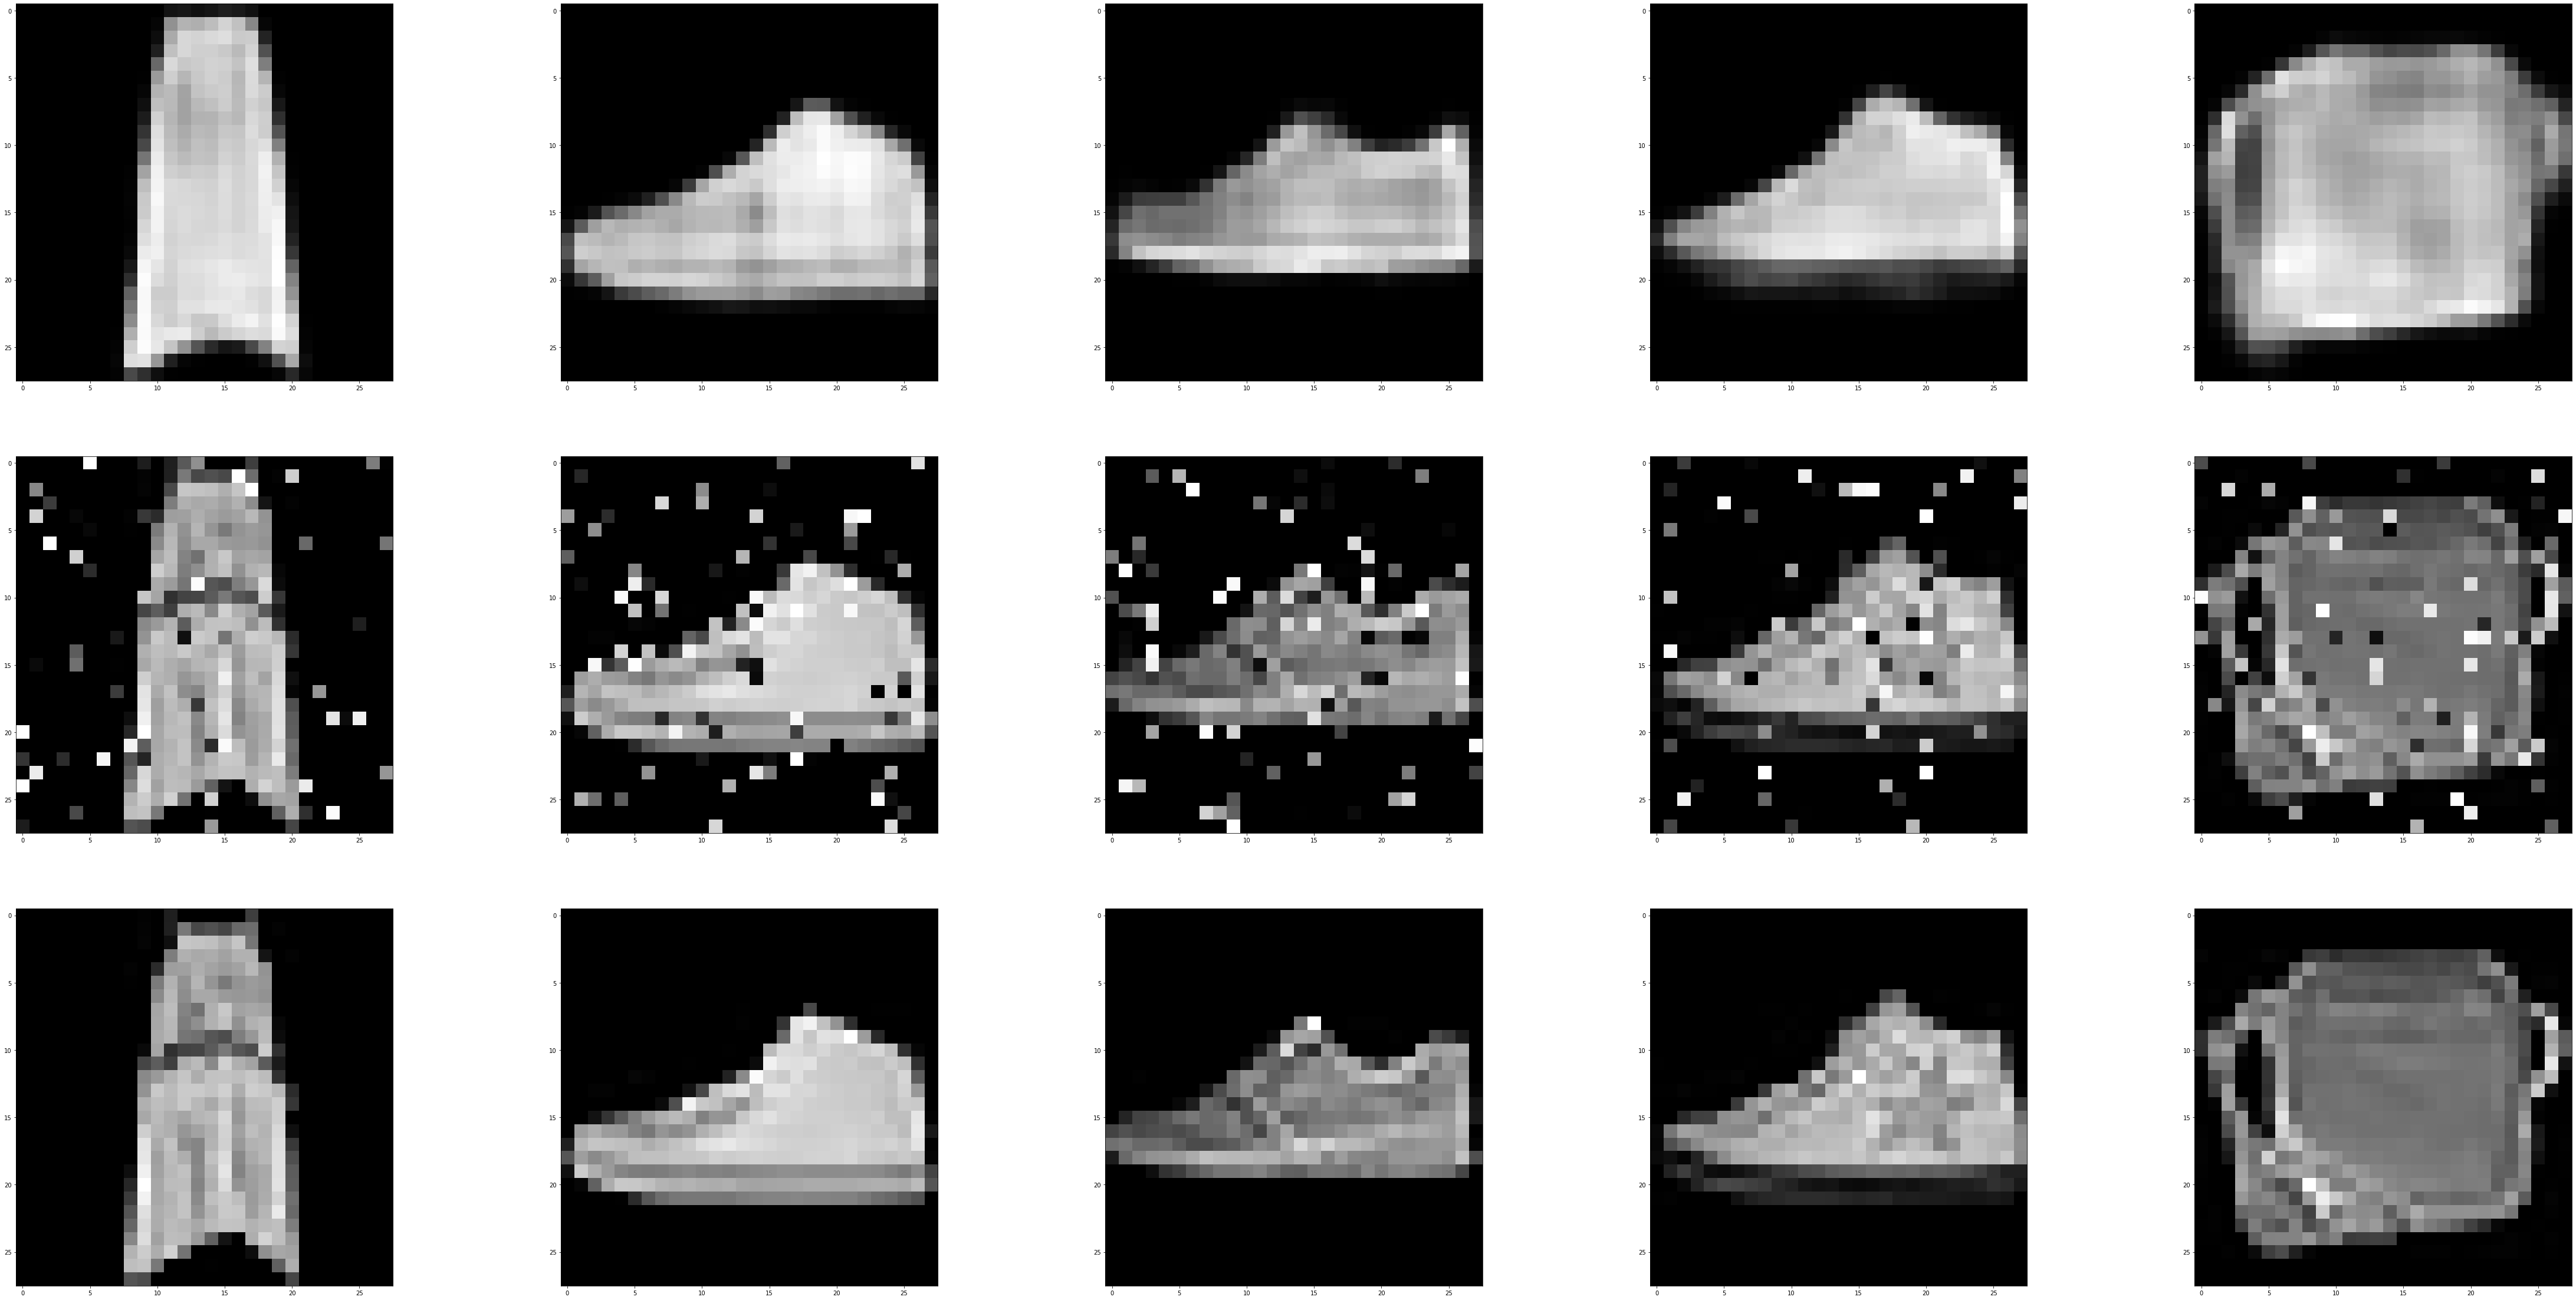

In [0]:
f, ax = plt.subplots(3,5)
f.set_size_inches(80, 40)
for i,a in enumerate(range(5)):
    ax[0,i].imshow(prediction[a, :, :, 0].reshape(28, 28))
    ax[1,i].imshow(val_x_n[n+i, :,:,0].reshape(28, 28))
    ax[2,i].imshow(x_test[n+i, :,:,0].reshape(28, 28))
plt.show()